In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [11]:
url = 'https://raw.githubusercontent.com/UlricWu/1080ti/master/projects/annual_income_EDA/annual_income.csv'
df = pd.read_csv(url)
df.head()

,row_id,age,education_years,workclass,marital_status,occupation,annual_income
0,1,48,14,Local-gov,Divorced,Prof-specialty,high_income
1,2,23,13,Local-gov,Never-married,Prof-specialty,low_income
2,3,45,13,Local-gov,Never-married,Prof-specialty,low_income
3,4,51,13,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,5,51,14,Local-gov,Married-civ-spouse,Prof-specialty,high_income


## Task 1 equal-width binning
### use equal-width binning with the following 3 bins for each numerical feature: low, mid, and high

In [12]:
df['age'] = pd.cut(df['age'], 3, labels = ['low', 'mid', 'high'])
df['education_years'] = pd.cut(df['education_years'],3, labels = ['low', 'mid', 'high'])
df_all_cat = df.copy()
x = df_all_cat.drop(columns = ['row_id', 'annual_income'])
y = df_all_cat['annual_income']

In [23]:
pd.set_option('display.max_columns', None) 
###
print(df_all_cat.shape)

names = df_all_cat.columns[1:]
 
for col in names: 
    print(col + ':')
    print(df_all_cat[col].value_counts())
    print('********')

(500, 7)
age:
mid     230
low     140
high    130
Name: age, dtype: int64
********
education_years:
high    304
mid     193
low       3
Name: education_years, dtype: int64
********
workclass:
Local-gov      225
State-gov      148
Federal-gov    127
Name: workclass, dtype: int64
********
marital_status:
Married-civ-spouse    230
Never-married         155
Divorced              115
Name: marital_status, dtype: int64
********
occupation:
Prof-specialty     224
Adm-clerical       159
Exec-managerial    117
Name: occupation, dtype: int64
********
annual_income:
low_income     320
high_income    180
Name: annual_income, dtype: int64
********


# Task 2  one-hot-encoding

In [91]:
df_all_cat_ohe = pd.get_dummies(x)

In [92]:
print(df_all_cat_ohe.shape)
df_all_cat_ohe.head()

(500, 15)


,age_low,age_mid,age_high,education_years_low,education_years_mid,education_years_high,workclass_Federal-gov,workclass_Local-gov,workclass_State-gov,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Prof-specialty
0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1


# Part B Bernoulli NB

In [138]:
from sklearn.naive_bayes import BernoulliNB

scores = []
bern = BernoulliNB()
bern.fit(df_all_cat_ohe, y)
score = bern.score(df_all_cat_ohe, y)
print('Bernoulli NB has accuracy of {score}'.format(score = score))

scores.append(score)

Bernoulli NB has accuracy of 0.816


# Part C Gaussian NB

In [139]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(df_all_cat_ohe, y)
score = gaus.score(df_all_cat_ohe, y)

print('Gaussian NB has accuracy of {score}'.format(score = score))
scores.append(score)

Gaussian NB has accuracy of 0.832


# Part D  Tuning

## Task 1 Turning

### BernoulliNB

In [140]:
import numpy as np

alphas = np.linspace(1, 1000)  
bern_score = []
for alpha in alphas:
    temp = BernoulliNB(alpha =alpha).fit(df_all_cat_ohe, y)
    bern_score.append(temp.score(df_all_cat_ohe, y))
    
index = bern_score.index(max(bern_score))
text = 'With alpha {alpha} of the Bernoulli NB mode, its accuracy is {score}'
print(text.format(alpha = alphas[index], score = bern_score[index]))

scores.append(bern_score[index])

With alpha 1.0 of the Bernoulli NB mode, its accuracy is 0.816


### GaussianNB

In [141]:
smoothings = np.linspace(0,1)[1:]
gaus_score = []
for smoothing in smoothings:
    gaus = GaussianNB(var_smoothing = smoothing)
    gaus.fit(df_all_cat_ohe, y)
    gaus_score.append(gaus.score(df_all_cat_ohe, y))
    
index = gaus_score.index(max(gaus_score))
test = 'With var_smoothing {smoothing} of the Gaussian NB mode, its accuracy is {score}'
print(test.format(smoothing = smoothings[index], score = gaus_score[index]))

scores.append(gaus_score[index])

With var_smoothing 0.02040816326530612 of the Gaussian NB mode, its accuracy is 0.756


## Task 2 plotting

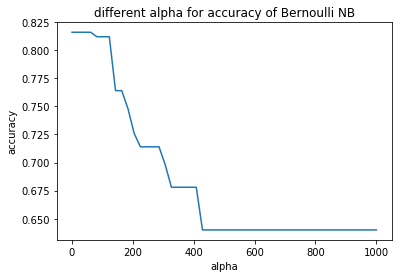

In [142]:
import matplotlib.pyplot as plt

plt.title('different alpha for accuracy of Bernoulli NB')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(alphas, bern_score)

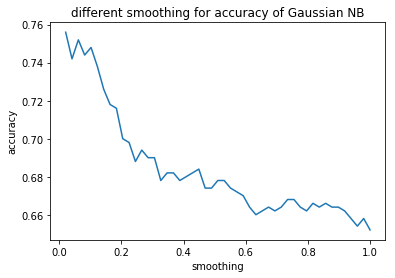

In [143]:
plt.title('different smoothing for accuracy of Gaussian NB')
plt.xlabel('smoothing')
plt.ylabel('accuracy')
plt.plot(smoothings, gaus_score)

## Part E Hyper NB
### Bernoulli NB that assumes all descriptive features are binary, and
### Gaussian NB that assumes all descriptive features are numerical and they follow a Gaussian probability distribution.

In [144]:
from sklearn.naive_bayes import CategoricalNB

df = pd.read_csv('A3_Q1_train.csv')
x_mix = df.drop(columns = ['row_id', 'annual_income'])
x_mix = pd.get_dummies(x_mix)

In [145]:
x_numerical = x_mix[['age', 'education_years']]
x_categorical = x_mix.drop(columns = ['age', 'education_years'])

In [146]:
bern = BernoulliNB()
bern.fit(x_categorical, y)
cate_score = bern.score(x_categorical, y)
print('For categorical features, Bernoulli NB has accuracy of {score}'.format(score = cate_score))

For categorical features, Bernoulli NB has accuracy of 0.816


In [147]:
gaus = GaussianNB()
gaus.fit(x_numerical, y)
cont_score = gaus.score(x_numerical, y)

print('For continuous features Gaussian NB has accuracy of {score}'.format(score = cont_score))

For continuous features Gaussian NB has accuracy of 0.72


In [148]:
mix_score = (cont_score* cate_score).round(3)
print('Hyper NB has accuracy of {score}'.format(score =mix_score ))
scores.append(mix_score)

Hyper NB has accuracy of 0.588


# Part F summary

In [149]:
names = ['Bernoulli', 'Gaussian', 'Tuned Bernoulli', 'Tuned Gaussian', 'Hybrid NB']

df_summary = pd.DataFrame(scores, names , columns = ['Accuracy'])
df_summary 

,Accuracy
Bernoulli,0.816
Gaussian,0.832
Tuned Bernoulli,0.816
Tuned Gaussian,0.756
Hybrid NB,0.588


In [150]:
df.columns

Index(['row_id', 'age', 'education_years', 'workclass', 'marital_status',
       'occupation', 'annual_income'],
      dtype='object')

In [151]:
df

,row_id,age,education_years,workclass,marital_status,occupation,annual_income
0,1,48,14,Local-gov,Divorced,Prof-specialty,high_income
1,2,23,13,Local-gov,Never-married,Prof-specialty,low_income
2,3,45,13,Local-gov,Never-married,Prof-specialty,low_income
3,4,51,13,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,5,51,14,Local-gov,Married-civ-spouse,Prof-specialty,high_income
5,6,21,9,Local-gov,Never-married,Prof-specialty,low_income
6,7,44,15,Federal-gov,Divorced,Prof-specialty,high_income
7,8,30,13,Local-gov,Never-married,Prof-specialty,low_income
8,9,55,13,Federal-gov,Married-civ-spouse,Exec-managerial,high_income
9,10,34,10,State-gov,Divorced,Adm-clerical,low_income


## Explains
# 1.Turnning method hugh improve the accuracy of Naive Bayes Models, up to 14% of the accuracy, because it adds some noise  in order to change the expected probability in a model of those data for calculation stability

# 2.  Hybrid NB model has less predictive power than the (untuned) Bernoulli and Gaussian NB models.it's because:
##  2.1 (untuned) Bernoulli and Gaussian NB models probably overfit while Hybrid NB gives the closest real solution
##  2.2 A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. In this case, it didn't meet the assumption because 'age', 'education_years', 'workclass', 'marital_status', 'occupation'  have some relations and are not independent
